# Análise de Nascimentos - Rondônia 2019

Este notebook apresenta gráficos gerados a partir dos arquivos mensais de nascimentos no estado de Rondônia em 2019, focando nos meses de março, abril, maio, junho e dezembro. O objetivo é explorar o total de nascimentos por mês e sua distribuição por sexo.
[texto do link](https://)

In [1]:
# Imports necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Imports necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## Dados utilizados

Os arquivos utilizados foram extraídos do sistema SINASC (Sistema de Informações sobre Nascidos Vivos) para o estado de Rondônia, no ano de 2019. Os arquivos considerados foram:

- SINASC_RO_2019_MAR.csv
- SINASC_RO_2019_ABR.csv
- SINASC_RO_2019_MAI.csv
- SINASC_RO_2019_JUN.csv
- SINASC_RO_2019_DEZ.csv

Cada arquivo representa os registros de nascimentos ocorridos no respectivo mês.


In [3]:
# Definindo os meses e arquivos
meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']
arquivos = {mes: f"SINASC_RO_2019_{mes}.csv" for mes in meses}

# Lendo os dados em um dicionário de DataFrames
dados = {}
for mes, caminho in arquivos.items():
    if os.path.exists(caminho):
        dados[mes] = pd.read_csv(caminho)
    else:
        print(f"Arquivo não encontrado: {caminho}")


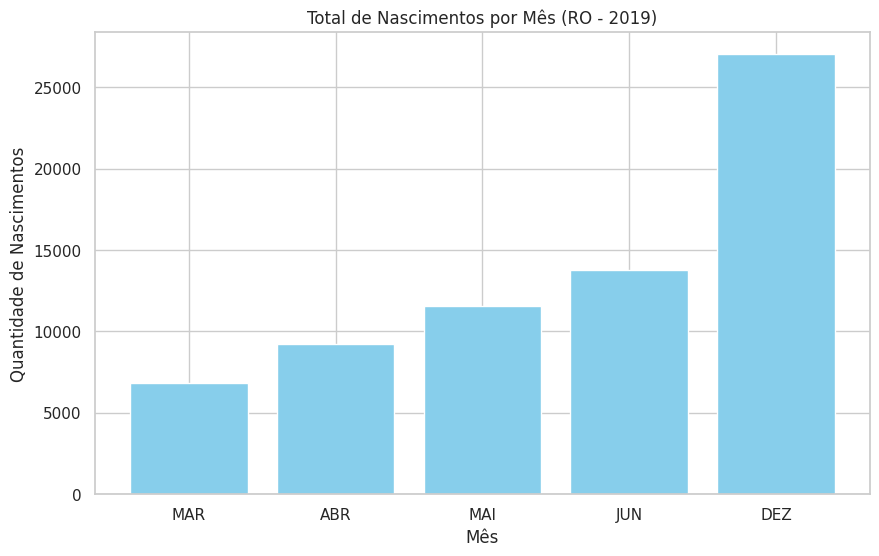

In [4]:
# Contagem de nascimentos por mês
totais = {mes: df.shape[0] for mes, df in dados.items()}

# Gráfico de barras
plt.bar(totais.keys(), totais.values(), color='skyblue')
plt.title("Total de Nascimentos por Mês (RO - 2019)")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Nascimentos")
plt.show()


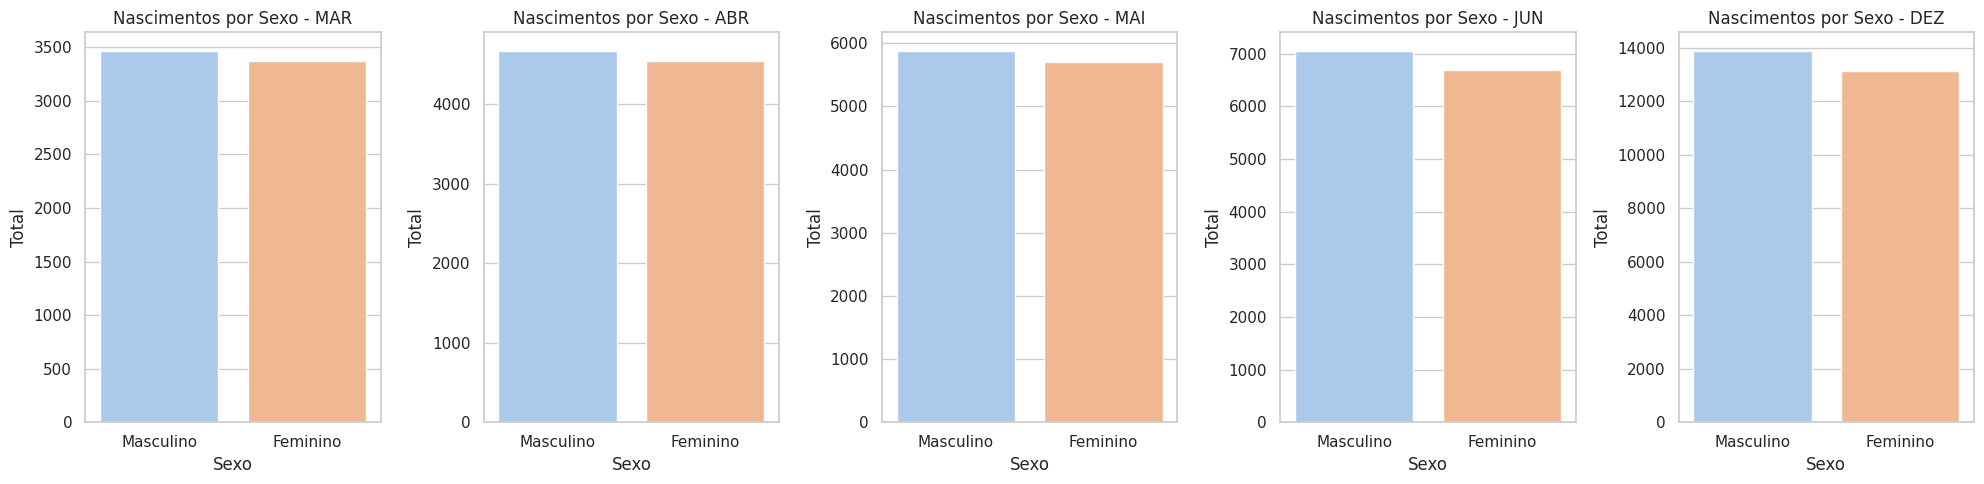

In [6]:
# Gráficos de barras por sexo para cada mês (ajustado para evitar warnings futuros)
fig, axs = plt.subplots(nrows=1, ncols=len(meses), figsize=(20, 5))

for idx, mes in enumerate(meses):
    sns.countplot(
        data=dados[mes],
        x="SEXO",
        hue="SEXO",
        ax=axs[idx],
        palette="pastel",
        legend=False
    )
    axs[idx].set_title(f"Nascimentos por Sexo - {mes}")
    axs[idx].set_xlabel("Sexo")
    axs[idx].set_ylabel("Total")

plt.tight_layout()
plt.show()


## 🔁 Como automatizar a geração de gráficos

Abaixo estão sugestões práticas para tornar o processo de geração de gráficos mais automatizado e adaptável a diferentes meses ou anos:

---

### 1. Uso de funções reutilizáveis

- Criar funções que:
  - Carregam arquivos com base em padrões de nomes (ex: `SINASC_RO_2019_MAR.csv`).
  - Geram gráficos a partir de qualquer DataFrame e coluna especificada.
- Isso evita repetição de código e facilita a manutenção.

---